# <center> Unsupervised Learning </center>

## Introduction

Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision.

In contrast to supervised learning that usually makes use of human-labeled data, unsupervised learning, also known as self-organization allows for modeling of probability densities over inputs.

It forms one of the three main categories of machine learning, along with supervised and reinforcement learning. Semi-supervised learning, a related variant, makes use of supervised and unsupervised techniques.

Two of the main methods used in unsupervised learning are __principal component__ and __cluster analysis__.

__Cluster analysis__ is used in unsupervised learning to group, or segment, datasets with shared attributes in order to extrapolate algorithmic relationships. Cluster analysis is a branch of machine learning that groups the data that has not been labelled, classified or categorized. Instead of responding to feedback, cluster analysis identifies commonalities in the data and reacts based on the presence or absence of such commonalities in each new piece of data. This approach helps detect anomalous data points that do not fit into either group.

One of the most widely used Clustering algorithm is __K-Means Algorithm__.


### K-Means: Introduction

K-Means is an unsupervised algorithm that aims to partition the dataset into
$K$ groups known as clusters such that data points belonging to a particular
cluster are similar in some manner and at the same time being different from
datapoints lying in other clusters. Clustering algorithms are mainly of two
types: $Hierarchical$ and $Partitional$. The hierarchical method attempts to
divide the dataset into a hierarchy of groups. The hierarchical division can
be represented by a tree type diagram known as a dendogram.The root node
here represents the entire dataset and each leaf node represents one object
of the dataset.
In case of partitional clustering, k partitions of n objects of the dataset
is made with k < n on the basis of some evaluation criteria.


### K-Means: Algorithm

The algorithm takes $k$, the number of clusters and the $dataset$ on which
clustering is to be performed as the input parameters. The clustering is to
be done in such a way so that the intra-cluster similarity is high while the
inter-cluster similarity is low. The main idea is to define k-means with each
mean representing each cluster and then the distance of each data-point from
each of the k means is calculated after which it is assigned to the cluster
corresponding to the least distance. In the next iteration, the $k-new$ means
are calculated from the previously grouped data and then re-clustering is
done in the same manner.This process is repeated in a loop until the new
means and the previous means converge with a very small error.

# K-Means Implementation

Importing libraries

In [1]:
import numpy as np
from pandas import DataFrame
import sklearn.datasets as data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.spatial.distance import chebyshev

### Generating Dataset

In [2]:
X,y, actual_mean = data.make_blobs(n_samples = 1000, centers = 5, n_features = 2, cluster_std=1, return_centers=True)
df = DataFrame(dict(x=X[:,0],y=X[:,1],label = y))
df

,x,y,label
0,-4.540422,-2.255637,3
1,-4.266611,-3.709534,3
2,-8.915656,-1.283784,0
3,-8.021779,1.829912,0
4,-11.341403,-3.924549,4
...,...,...,...
995,7.085603,8.267847,2
996,-8.579084,-1.017381,0
997,-2.954977,-2.930582,3
998,-7.072111,-0.071490,0


In [3]:
# c

### Plotting the Data set

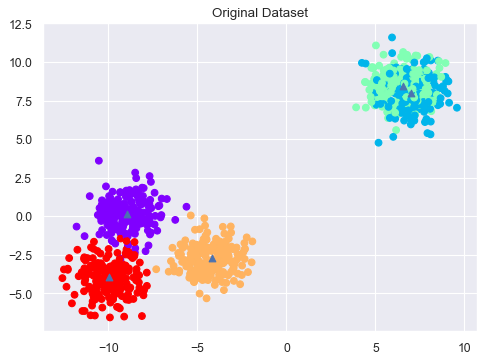

In [4]:
plt.figure(figsize=(7,5),dpi=80)
plt.scatter(df.x,df.y,c=df.label,cmap='rainbow')
plt.scatter(actual_mean[:,0], actual_mean[:,1], marker='^')
plt.title("Original Dataset")
plt.show()

---
# K-means using Euclidean distance

In [5]:
k=5
im=X
im.shape

(1000, 2)

In [6]:

mean = np.empty([k,im.shape[1]])
duplicate = []
for i in range(k):   # Initialisation of the Mean Vectors
    temp = np.random.randint(0,im.shape[0])
    if temp not in duplicate:
        mean[i,:] = im[temp,:]
        duplicate.append(temp)
    else:
        temp = np.random.randint(0,im.shape[0])
        mean[i,:] = im[temp,:]
        duplicate.append(temp)
error = 100.0
c = 1

In [7]:
duplicate,mean

([967, 525, 713, 75, 828],
 array([[ 7.29487532,  7.53080165],
        [ 7.357532  ,  8.95593596],
        [-4.77668411, -3.60150705],
        [-8.9121978 ,  0.22405277],
        [-9.5034427 ,  0.83402197]]))

In [8]:
y

array([3, 3, 0, 0, 4, 3, 0, 3, 4, 3, 1, 2, 3, 3, 1, 1, 3, 2, 1, 0, 2, 4,
       2, 4, 2, 0, 3, 1, 3, 3, 0, 3, 4, 4, 2, 2, 2, 4, 4, 1, 0, 2, 0, 0,
       3, 2, 3, 3, 2, 3, 0, 1, 3, 2, 2, 1, 4, 0, 3, 0, 1, 4, 3, 4, 0, 1,
       3, 2, 0, 0, 3, 0, 3, 4, 0, 0, 3, 1, 3, 2, 2, 1, 2, 3, 4, 4, 0, 2,
       2, 3, 2, 4, 0, 4, 4, 2, 4, 2, 1, 4, 2, 4, 1, 1, 3, 4, 3, 1, 2, 2,
       3, 3, 2, 0, 4, 1, 1, 1, 0, 2, 4, 1, 4, 1, 1, 0, 1, 1, 1, 1, 2, 1,
       4, 3, 3, 2, 4, 1, 3, 0, 0, 1, 1, 1, 3, 4, 2, 0, 0, 1, 2, 1, 1, 1,
       4, 1, 1, 2, 4, 1, 3, 1, 4, 1, 3, 4, 4, 2, 3, 2, 3, 3, 3, 4, 2, 0,
       0, 0, 4, 3, 4, 3, 2, 4, 4, 0, 1, 3, 3, 1, 1, 2, 2, 0, 1, 2, 0, 4,
       0, 4, 4, 4, 4, 0, 2, 2, 2, 2, 3, 4, 4, 3, 3, 1, 3, 4, 4, 0, 2, 1,
       1, 0, 2, 2, 1, 0, 1, 3, 2, 1, 3, 3, 3, 3, 4, 2, 0, 3, 3, 1, 4, 1,
       2, 0, 4, 1, 0, 2, 0, 1, 1, 2, 0, 2, 4, 4, 0, 1, 1, 1, 4, 0, 4, 3,
       3, 0, 2, 4, 2, 0, 4, 4, 1, 3, 2, 3, 4, 0, 0, 1, 2, 4, 0, 4, 3, 2,
       2, 2, 2, 3, 0, 3, 2, 1, 1, 0, 3, 2, 4, 2, 3,

In [9]:
epsilon=0.1
while(error > epsilon):
        labels = []
        for i in range(im.shape[0]):
            norm = []
            for j in range(k):   # Computing the euclidian distance of every point with Mean Centers
                norm.append(np.linalg.norm((im[i,:]-mean[j,:]),2))
            norm = np.array(norm)
            index = np.argmin(norm)
            labels.append(index)
        print(labels)
            # break
        new_mean = np.empty([k,im.shape[1]])
        for i in range(k):
            n = 0
            prev_mean = mean
            for j in range(im.shape[0]):
                if (i==labels[j]):
                    new_mean[i,:]=(new_mean[i,:]+im[j,:])
                    n+=1
            if n!=0:                        # Computing "new Mean"
                new_mean[i,:] = new_mean[i,:]/n
            else:
                new_mean[i,:] = prev_mean[i,:]
        error_temp = []
        for i in range(k):     # Checking for convergence
            error_temp.append(np.linalg.norm((new_mean[i,:]-mean[i,:]),2))
        error = max(error_temp)
        mean = new_mean
        break

[2, 2, 3, 4, 3, 2, 3, 2, 3, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 3, 1, 3, 0, 2, 0, 3, 2, 1, 2, 3, 3, 2, 3, 3, 1, 1, 1, 3, 3, 0, 4, 1, 4, 3, 2, 0, 2, 2, 1, 2, 3, 0, 2, 1, 0, 1, 3, 4, 2, 4, 1, 3, 2, 2, 3, 1, 2, 1, 3, 3, 2, 4, 2, 3, 3, 3, 2, 0, 2, 0, 1, 1, 1, 2, 3, 3, 3, 0, 1, 2, 1, 2, 4, 3, 3, 1, 3, 0, 0, 2, 0, 2, 1, 0, 2, 3, 2, 0, 0, 0, 2, 2, 0, 3, 3, 0, 1, 1, 3, 0, 2, 0, 3, 0, 0, 3, 0, 0, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 2, 3, 3, 0, 1, 0, 2, 2, 1, 4, 3, 1, 1, 1, 0, 1, 2, 1, 0, 1, 3, 1, 2, 1, 2, 0, 2, 3, 3, 0, 2, 1, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 2, 3, 1, 2, 2, 0, 1, 1, 1, 4, 0, 1, 3, 3, 4, 3, 3, 3, 3, 3, 1, 1, 0, 1, 2, 3, 3, 2, 2, 1, 2, 2, 2, 3, 0, 1, 0, 3, 0, 1, 1, 3, 0, 2, 0, 1, 2, 2, 2, 2, 3, 1, 3, 2, 2, 0, 3, 0, 0, 4, 2, 0, 4, 0, 4, 1, 1, 1, 3, 0, 3, 2, 3, 1, 0, 0, 3, 4, 2, 2, 2, 3, 1, 3, 1, 4, 3, 3, 1, 2, 1, 2, 3, 3, 3, 0, 0, 3, 4, 3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 0, 0, 3, 2, 1, 3, 0, 2, 0, 2, 4, 2, 1, 4, 2, 2, 0, 0, 2, 4, 4, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 2, 4, 4, 0, 3, 2, 2, 3, 1, 

In [10]:
def kmeans(im,k,epsilon,c_mean): # k is the number of clusters required
    mean = np.empty([k,im.shape[1]])
    duplicate = []
    for i in range(k):   # Initialisation of the Mean Vectors
        temp = np.random.randint(0,im.shape[0])
        if temp not in duplicate:
            mean[i,:] = im[temp,:]
            duplicate.append(temp)
        else:
            temp = np.random.randint(0,im.shape[0])
            mean[i,:] = im[temp,:]
            duplicate.append(temp)
    error = 100.0
    c = 1
    while(error > epsilon):
        labels = []
        for i in range(im.shape[0]):
            norm = []
            for j in range(k):   # Computing the euclidian distance of every point with Mean Centers
                norm.append(np.linalg.norm((im[i,:]-mean[j,:]),2))
                
            norm = np.array(norm)
            index = np.argmin(norm)
            labels.append(index)
        new_mean = np.empty([k,im.shape[1]])
        for i in range(k):
            n = 0
            prev_mean = mean
            for j in range(im.shape[0]):
                if (i==labels[j]):
                    new_mean[i,:]=(new_mean[i,:]+im[j,:])
                    n+=1
            if n!=0:                        # Computing "new Mean"
                new_mean[i,:] = new_mean[i,:]/n
            else:
                new_mean[i,:] = prev_mean[i,:]
        error_temp = []
        for i in range(k):     # Checking for convergence
            error_temp.append(np.linalg.norm((new_mean[i,:]-mean[i,:]),2))
        error = max(error_temp)
        mean = new_mean

        print("Iteration: ",c,mean)
        plt.figure()
        plt.scatter(im[:,0],im[:,1], c=labels,cmap='rainbow')
        plt.scatter(mean[:,0], mean[:,1], marker='x', c='y')
        plt.scatter(c_mean[:,0], c_mean[:,1], marker='^', c='r')
        plt.show()
        c +=1

Iteration:  1 [[ 5.23498644  8.79392812]
 [-8.45717978 -2.17554925]
 [ 6.7781247   6.92850894]
 [-3.49386967 -2.37903522]
 [ 6.99827714  8.69703034]]


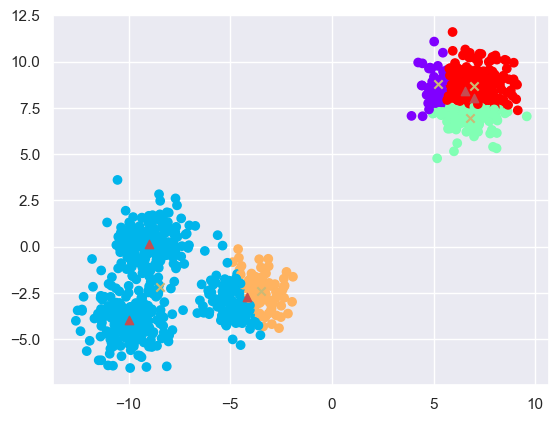

Iteration:  2 [[ 5.35106628  8.58912569]
 [-9.38667958 -1.97722113]
 [ 7.03113056  7.09784582]
 [-4.12130222 -2.68810967]
 [ 7.2709202   8.82614918]]


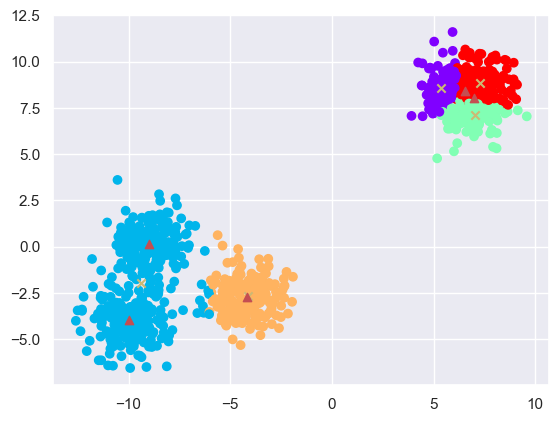

Iteration:  3 [[ 5.51954497  8.52453324]
 [-9.45665285 -1.96130111]
 [ 7.13032072  7.19402165]
 [-4.21816321 -2.68788125]
 [ 7.40047919  8.96621476]]


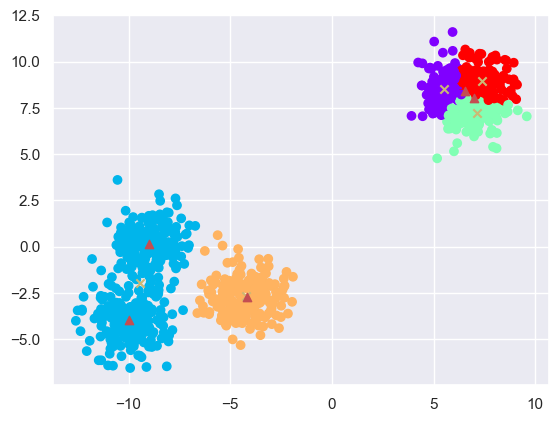

Iteration:  4 [[ 5.64380904  8.48640441]
 [-9.45665285 -1.96130111]
 [ 7.19527323  7.22489529]
 [-4.21816321 -2.68788125]
 [ 7.48494584  9.08522644]]


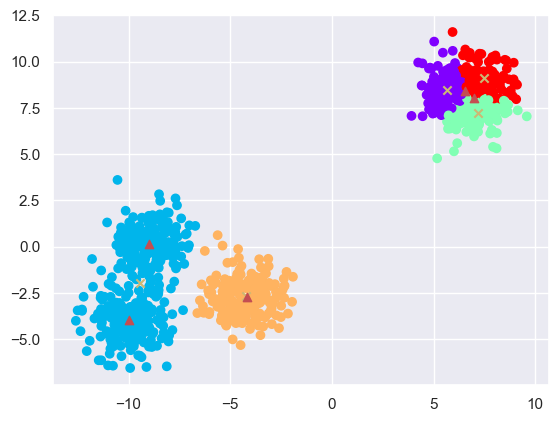

Iteration:  5 [[ 5.68659426  8.46852465]
 [-9.45665285 -1.96130111]
 [ 7.23571019  7.27348712]
 [-4.21816321 -2.68788125]
 [ 7.5227822   9.16658888]]


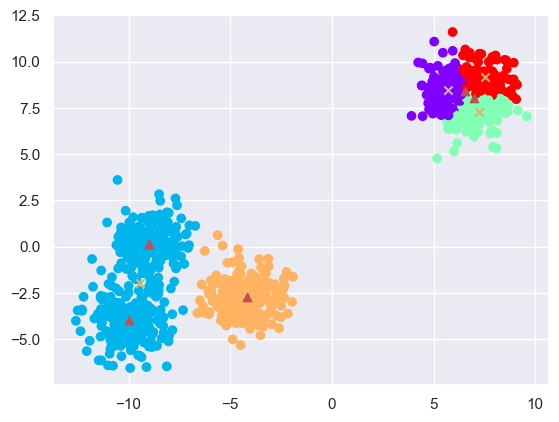

Iteration:  6 [[ 5.69142025  8.45480943]
 [-9.45665285 -1.96130111]
 [ 7.2554194   7.29898305]
 [-4.21816321 -2.68788125]
 [ 7.50575372  9.21624834]]


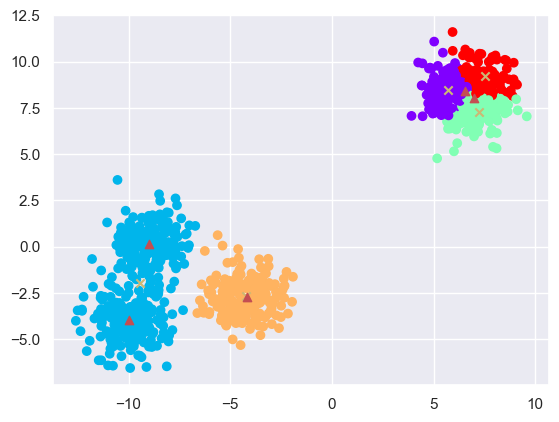

Iteration:  7 [[ 5.69142025  8.45480943]
 [-9.45665285 -1.96130111]
 [ 7.2562427   7.3272346 ]
 [-4.21816321 -2.68788125]
 [ 7.51311067  9.24810869]]


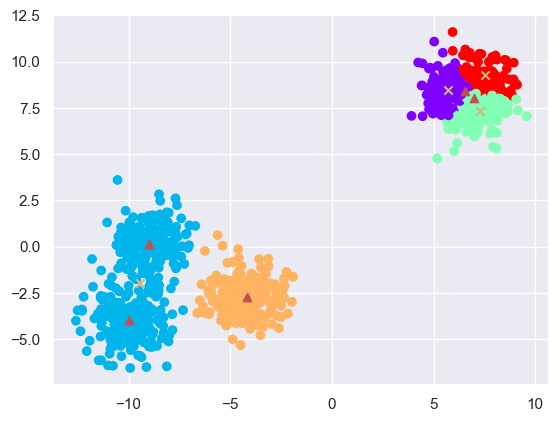

Iteration:  8 [[ 5.69142025  8.45480943]
 [-9.45665285 -1.96130111]
 [ 7.2562427   7.3272346 ]
 [-4.21816321 -2.68788125]
 [ 7.51311067  9.24810869]]


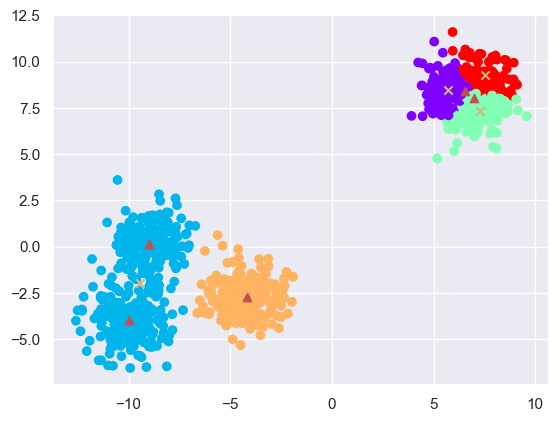

In [11]:
# Calling our function
kmeans(X,5,0.001,actual_mean)

---
# K-means using Chebyshev distance

In [12]:
def kmeans_ch(im,k,epsilon):
    mean = np.empty([k,im.shape[1]])
    duplicate = []
    for i in range(k):
        temp = np.random.randint(0,im.shape[0])
        if temp not in duplicate:
            mean[i,:] = im[temp,:]
            duplicate.append(temp)
        else:
            temp = np.random.randint(0,im.shape[0])
            mean[i,:] = im[temp,:]
            duplicate.append(temp)
    error = 100.0
    c = 1
    while(error > epsilon):
        labels = []
        for i in range(im.shape[0]):
            norm = []
            for j in range(k):
                norm.append(chebyshev(im[i,:],mean[j,:])) ## Here is the only change # Chebyshev distance
            norm = np.array(norm)
            index = np.argmin(norm)
            labels.append(index)
        new_mean = np.zeros([k,im.shape[1]])
        for i in range(k):
            n = 0
            prev_mean=mean
            for j in range(im.shape[0]):
                if (i == labels[j]):
                    new_mean[i,:]=(new_mean[i,:]+im[j,:])
                    n+=1
            if n!=0:
                new_mean[i,:] = new_mean[i,:]/n
            else:
                new_mean[i,:] = prev_mean[i,:]
        error_temp = []
        for i in range(k):
            error_temp.append(chebyshev(new_mean[i,:],mean[i,:]))
        error = max(error_temp)
        mean = new_mean

        print("Iteration",c)
        plt.figure()
        plt.scatter(im[:,0],im[:,1],c=labels,cmap='rainbow')
        plt.scatter(mean[:,0], mean[:,1], marker='x', c='y')
        #plt.scatter(c_mean[:,0], c_mean[:,1], marker='^', c='r')
        plt.show()
        c += 1

Iteration 1


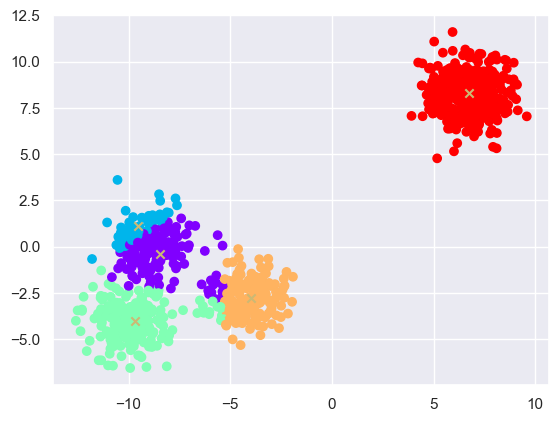

Iteration 2


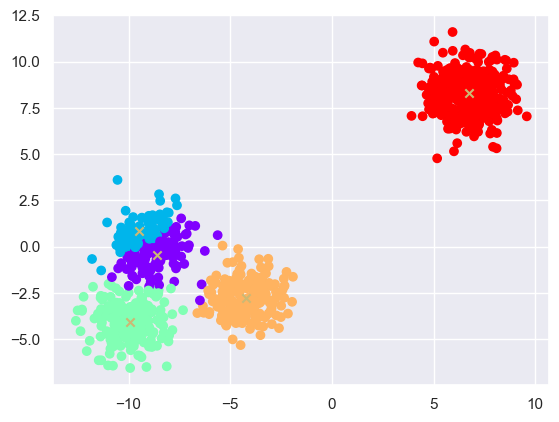

Iteration 3


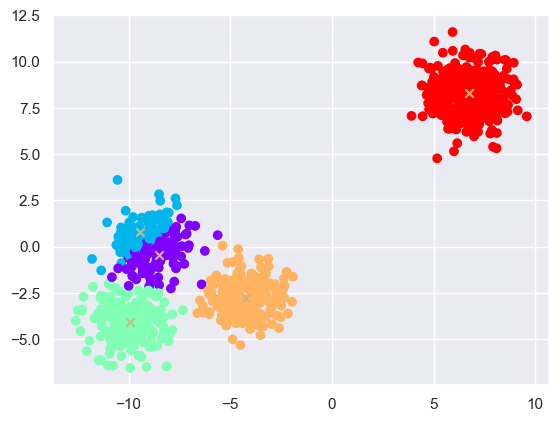

Iteration 4


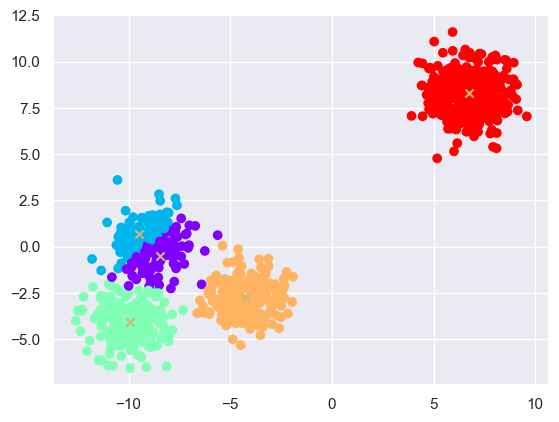

Iteration 5


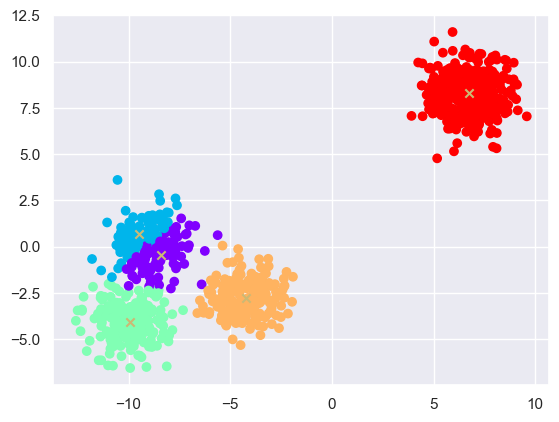

Iteration 6


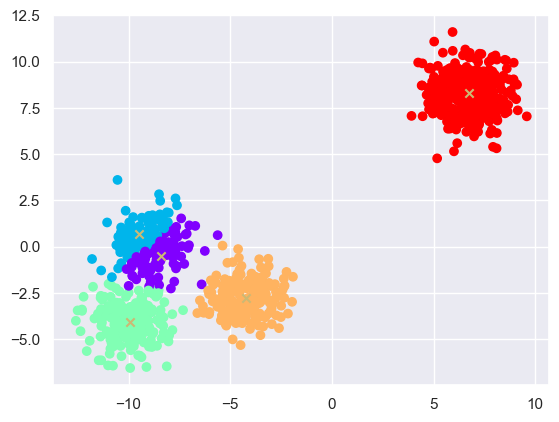

Iteration 7


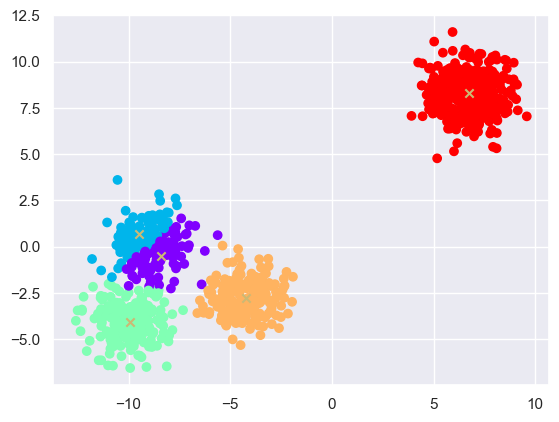

In [13]:
kmeans_ch(X, 5,0.001)

## K-Means Using Sklearn's Library Function

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

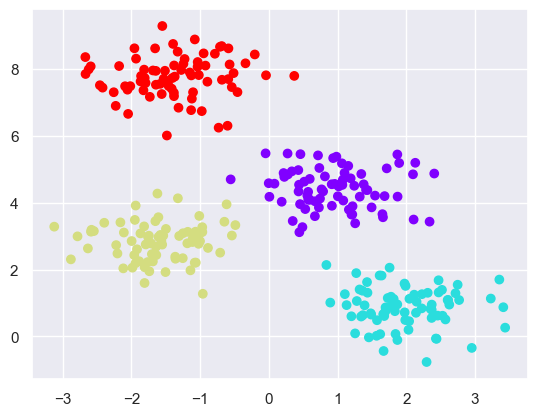

In [15]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c = y_true,cmap='rainbow');

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


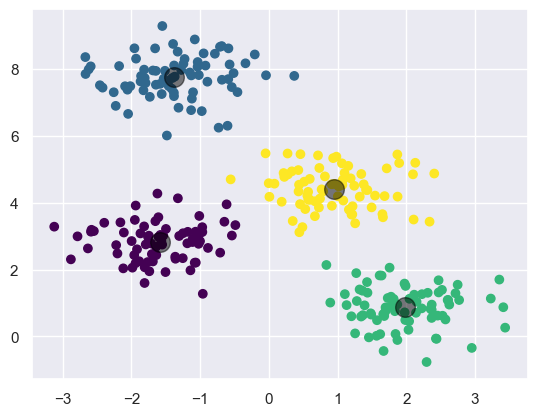

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Limitations of K-Means Algorithm

In [18]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


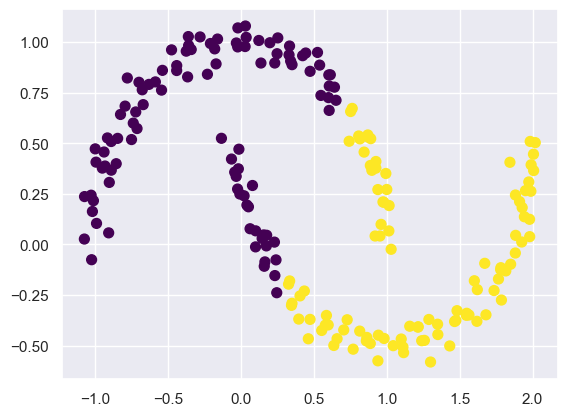

In [19]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Comparision with some other Non-Convex Clustering Algorithm

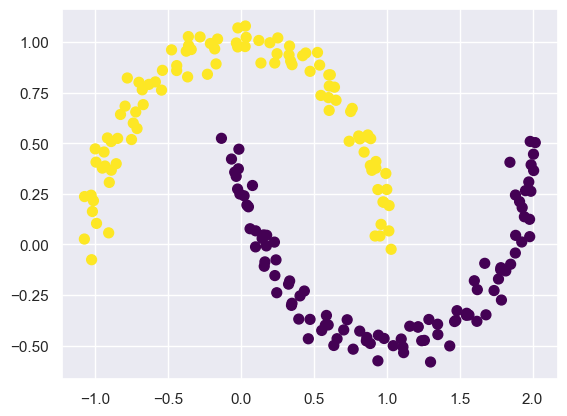

In [20]:
from sklearn.cluster import SpectralClustering
import warnings
warnings.simplefilter("ignore")

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');